Load data and import libraries

In [282]:
import pandas as pd
from helpers.data_preprocessing import DataProcesser

data = pd.read_csv("./../../data/train_set_0520.csv", usecols=['comment', 'non-information'])

comments = data['comment'].apply(str)

### Preprocess data:
1. remove all special characters and accents
2. turn all characters into lower case

In [283]:
comments = comments.map(DataProcesser.remove_special_characters)
comments = comments.map(DataProcesser.remove_accented_chars)
comments = comments.map(lambda com : com.lower())
comments.head()

0    implnote taken from link comsunjavafxscenecont...
1    iconsettooltiptextprintedviewmodelgetlocalization
2    synchronize changes of the underlying date val...
3    ask if the user really wants to close the give...
4                                     css information 
Name: comment, dtype: object

3. stemming --> put the word into its most basic form

In [284]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
comments = [(" ".join(list(map(ps.stem, comment.split())))) for comment in comments]
comments[0:15]

['implnot taken from link comsunjavafxscenecontrolbehaviortextareabehaviorcontextmenurequestedjavafxsceneinputcontextmenuev',
 'iconsettooltiptextprintedviewmodelgetloc',
 'synchron chang of the underli date valu with the temporalaccessorvalu',
 'ask if the user realli want to close the given databas',
 'css inform',
 'check if there is a default type with the same name if so thi is a modif of that type so remov the default one',
 'each entri type',
 'todo usernam domain and ident should be includ as in net version todo should check seem that it is not includ in logj',
 'alreadi pars via command line paramet eg jabrefjar somefilebib',
 'final add thing to the current open tab',
 'to simplifi the export api we simpli do a normal export to a temporari file and read the content afterward',
 'thi class monitor a set of file for chang upon detect a chang it notifi the regist link fileupdatelisten implement base on httpsstackoverflowcomquestionscaniwatchforsinglefilechangewithwatchservicenot

Split words and put them into a list

In [285]:
split_comments = " ".join(comments)
split_comments = split_comments.split()
split_comments[0:15]

['implnot',
 'taken',
 'from',
 'link',
 'comsunjavafxscenecontrolbehaviortextareabehaviorcontextmenurequestedjavafxsceneinputcontextmenuev',
 'iconsettooltiptextprintedviewmodelgetloc',
 'synchron',
 'chang',
 'of',
 'the',
 'underli',
 'date',
 'valu',
 'with',
 'the']

count word frequency

In [286]:
from collections import Counter
counted_comments = Counter(split_comments)
{k: counted_comments[k] for k in list(counted_comments)[:15]}

{'implnot': 2,
 'taken': 10,
 'from': 105,
 'link': 161,
 'comsunjavafxscenecontrolbehaviortextareabehaviorcontextmenurequestedjavafxsceneinputcontextmenuev': 1,
 'iconsettooltiptextprintedviewmodelgetloc': 1,
 'synchron': 1,
 'chang': 99,
 'of': 330,
 'the': 1461,
 'underli': 3,
 'date': 18,
 'valu': 60,
 'with': 105,
 'temporalaccessorvalu': 1}

15 most common words

In [287]:
most_occur = counted_comments.most_common(15)
most_occur

[('the', 1461),
 ('to', 587),
 ('a', 455),
 ('is', 353),
 ('of', 330),
 ('thi', 311),
 ('in', 279),
 ('and', 272),
 ('if', 263),
 ('for', 258),
 ('entri', 215),
 ('it', 207),
 ('file', 201),
 ('be', 185),
 ('link', 161)]

remove stopwords

In [288]:
comments_cleaned = list(map(DataProcesser.remove_stopwords, comments))
comments_cleaned[0:15]

['implnot taken link comsunjavafxscenecontrolbehaviortextareabehaviorcontextmenurequestedjavafxsceneinputcontextmenuev',
 'iconsettooltiptextprintedviewmodelgetloc',
 'synchron chang underli date valu temporalaccessorvalu',
 'ask user realli want close given databas',
 'css inform',
 'check default type name thi modif type remov default one',
 'entri type',
 'todo usernam domain ident includ net version todo check seem includ logj',
 'alreadi pars via command line paramet eg jabrefjar somefilebib',
 'final add thing current open tab',
 'simplifi export api simpli normal export temporari file read content afterward',
 'thi class monitor set file chang upon detect chang notifi regist link fileupdatelisten implement base httpsstackoverflowcomquestionscaniwatchforsinglefilechangewithwatchservicenotthewholedirectori',
 'autogroup',
 'creat new list element convert use provid map chang underli list propag convert list contrast link orgfxmisceasybindeasybindmapobservablelist function item con

most common words after removing stopwords

In [289]:
split_comments = " ".join(comments_cleaned)
split_comments = split_comments.split()
counted_comments = Counter(split_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('thi', 311),
 ('entri', 215),
 ('file', 201),
 ('link', 161),
 ('method', 148),
 ('use', 139),
 ('return', 112),
 ('new', 104),
 ('set', 103),
 ('chang', 99),
 ('type', 97),
 ('field', 92),
 ('given', 91),
 ('dialog', 91),
 ('string', 81)]

Word Cloud

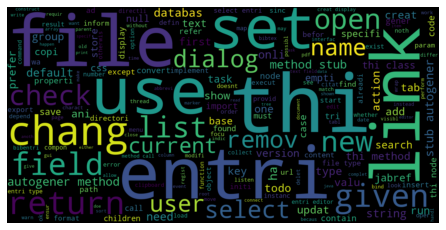

<Figure size 432x288 with 0 Axes>

In [290]:
# Generate a word cloud image
comments_cleaned = " ".join(comments_cleaned)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud1 = WordCloud(width=1600, height=800).generate(comments_cleaned)
import matplotlib.pyplot as plt

# Display the generated image:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig('./comment_wordcloud.png', facecolor='k', bbox_inches='tight')

Non-information 'yes' comments

In [291]:
data.head()
bad_comments = data[data['non-information'] == 'yes']
bad_comments = bad_comments['comment'].apply(str)

#data cleaning
#remove special characters
bad_comments = bad_comments.map(DataProcesser.remove_special_characters)
#remove accented chars
bad_comments = bad_comments.map(DataProcesser.remove_accented_chars)
#to lower case
bad_comments = bad_comments.map(lambda com : com.lower())

#stemming
ps = PorterStemmer()
bad_comments = [(" ".join(list(map(ps.stem, comment.split())))) for comment in bad_comments]

#remove stopwords
bad_comments = list(map(DataProcesser.remove_stopwords, bad_comments))
bad_comments[:15]

['implnot taken link comsunjavafxscenecontrolbehaviortextareabehaviorcontextmenurequestedjavafxsceneinputcontextmenuev',
 'iconsettooltiptextprintedviewmodelgetloc',
 'ask user realli want close given databas',
 'entri type',
 'final add thing current open tab',
 'db file exist',
 'dir must folder file',
 'save',
 'clear current log',
 'revert chang',
 'get search describ given search queri',
 'return hashmap contain key bind',
 'add given entri thi node group',
 'default',
 'bug report bodi']

What words are most common among the non-information 'yes' comments?

In [292]:
#split into words
split_comments = " ".join(bad_comments)
split_comments = split_comments.split()
counted_comments = Counter(split_comments)
{k: counted_comments[k] for k in list(counted_comments)[:15]}
most_occur = counted_comments.most_common(15)
most_occur

[('method', 57),
 ('autogener', 54),
 ('stub', 54),
 ('entri', 33),
 ('return', 28),
 ('given', 23),
 ('file', 22),
 ('css', 21),
 ('key', 20),
 ('thi', 18),
 ('check', 17),
 ('new', 15),
 ('databas', 14),
 ('chang', 13),
 ('default', 13)]

Word Cloud of non-information 'yes' comments

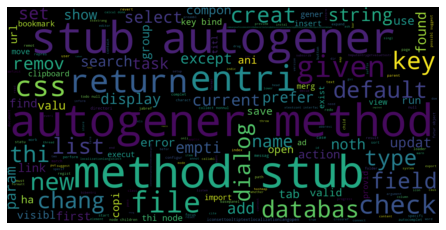

In [293]:
# Generate a word cloud image
comments_cleaned = " ".join(bad_comments)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud1 = WordCloud(width=1600, height=800).generate(comments_cleaned)
import matplotlib.pyplot as plt

# Display the generated image:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Non-information 'no' comments

In [294]:
data.head()
good_comments = data[data['non-information'] == 'no']
good_comments = good_comments['comment'].apply(str)

#data cleaning
#remove special characters
good_comments = good_comments.map(DataProcesser.remove_special_characters)
#remove accented chars
good_comments = good_comments.map(DataProcesser.remove_accented_chars)
#to lower case
good_comments = good_comments.map(lambda com : com.lower())

#stemming
ps = PorterStemmer()
good_comments = [(" ".join(list(map(ps.stem, comment.split())))) for comment in good_comments]

#remove stopwords
good_comments = list(map(DataProcesser.remove_stopwords, good_comments))
good_comments[:15]

['synchron chang underli date valu temporalaccessorvalu',
 'css inform',
 'check default type name thi modif type remov default one',
 'todo usernam domain ident includ net version todo check seem includ logj',
 'alreadi pars via command line paramet eg jabrefjar somefilebib',
 'simplifi export api simpli normal export temporari file read content afterward',
 'thi class monitor set file chang upon detect chang notifi regist link fileupdatelisten implement base httpsstackoverflowcomquestionscaniwatchforsinglefilechangewithwatchservicenotthewholedirectori',
 'autogroup',
 'creat new list element convert use provid map chang underli list propag convert list contrast link orgfxmisceasybindeasybindmapobservablelist function item convert insert initi instead access thu initi cpu overhead memori consumpt higher access list item quicker',
 'set link consum invok task ha fail except consum alway run javafx thread',
 'todo add undo final undoablemodifysubtre undo new undoablemodifysubtreegetgrou

What words are most common among the non-information 'no' comments?

In [295]:
#split into words
split_comments = " ".join(good_comments)
split_comments = split_comments.split()
counted_comments = Counter(split_comments)
{k: counted_comments[k] for k in list(counted_comments)[:15]}
most_occur = counted_comments.most_common(15)
most_occur

[('thi', 293),
 ('entri', 182),
 ('file', 179),
 ('link', 155),
 ('use', 133),
 ('set', 92),
 ('method', 91),
 ('new', 89),
 ('chang', 86),
 ('type', 85),
 ('return', 84),
 ('field', 80),
 ('dialog', 79),
 ('select', 71),
 ('string', 69)]

Non-information 'no' comments

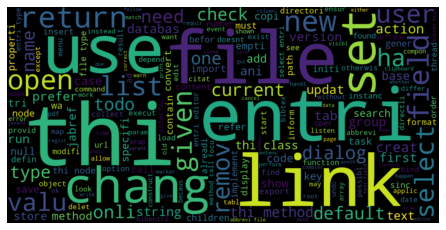

In [296]:
# Generate a word cloud image
comments_cleaned = " ".join(good_comments)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud1 = WordCloud(width=1600, height=800).generate(comments_cleaned)
import matplotlib.pyplot as plt

# Display the generated image:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()